# HW 3
## Tim Demetriades
### AAI 646 - B - Hong Man
4/16/2022

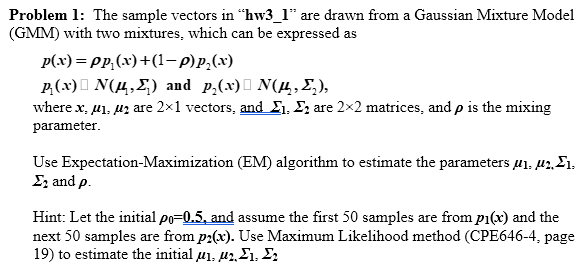

First some things are initialized.

In [1]:
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
hw3_1 = io.loadmat('hw3.mat')['hw3_1']

In [3]:
p_0 = 0.5

The 100 samples are arbitrarily split into 2 groups, with the first 50 being assigned to Gaussian 1 and the other 50 being assigned to Gaussian 2.

In [4]:
gaussian_1 = hw3_1.T[0:50]
gaussian_2 = hw3_1.T[50:]

A label vector is created to assign samples to each Gaussian, with 1 meaning it is in Gaussian 1 and 2 meaning it is in Gaussian 2.

In [47]:
ones_array = np.ones((1, 50)).astype(int)
twos_array = 2 * ones_array.astype(int)
label_vector = np.hstack((ones_array, twos_array)).reshape(100)
label_vector

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### First Iteration

This is an iterative process. The first thing that must be done is the mu (mean) and covariance are calculated for each Gaussian.

In [6]:
def calc_mu(x):
    mu = sum(x) / len(x)
    # np.mean(gaussian_1, axis = 0)
    return mu

In [7]:
mu_1 = calc_mu(gaussian_1)
mu_1

array([ 0.56558251, -0.62238613])

In [8]:
mu_2 = calc_mu(gaussian_2)
mu_2

array([ 1.90664303, -1.4084691 ])

In [9]:
def calc_covariance(x):
    sum = 0
    for i in range(len(x)):
        sum += (x[i] - mu_1).reshape(-1, 1) @ (x[i] - mu_1).reshape(-1, 1).T
    covariance = sum / len(x)
    return covariance

In [10]:
covariance_1 = calc_covariance(gaussian_1)
covariance_1

array([[ 3.31211341, -0.94753205],
       [-0.94753205,  2.24458668]])

In [11]:
covariance_2 = calc_covariance(gaussian_2)
covariance_2

array([[ 8.15687883, -4.85026589],
       [-4.85026589,  7.99781434]])

Now that we have means and covariances for the two groups, we can use the pdf of the multivariate Gaussian to find the likelihood of each of the 100 samples.

In [12]:
likelihood_1 = multivariate_normal.pdf(hw3_1.T, mu_1, covariance_1)

In [13]:
likelihood_2 = multivariate_normal.pdf(hw3_1.T, mu_2, covariance_2)

For each sample, we assign it to a new Gaussian based on the two liklihood values. If the likelihood 1 is higher it is assigned to Gaussian 1 and if likelihood 2 is higher we assign it to Gaussian 2.

In [14]:
def adjust_label_vector(likelihood_1, likelihood_2, label_vector):
    for i in range(len(hw3_1.T)):
        if likelihood_1[i] > likelihood_2[i]:
            label_vector[i] = 1
        elif likelihood_1[i] < likelihood_2[i]:
            label_vector[i] = 2
    return label_vector

In [15]:
label_vector = adjust_label_vector(likelihood_1, likelihood_2, label_vector)
label_vector

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1])

The new label vector is used to split the 100 samples into 2 new Gaussians.

In [16]:
def assign_new_gaussians(label_vector):
    gaussian_1_list = []
    gaussian_2_list = []
    for i in range(len(label_vector)):
        if label_vector[i] == 1:
            gaussian_1_list.append(hw3_1.T[i])
        elif label_vector[i] == 2:
            gaussian_2_list.append(hw3_1.T[i])
    return np.asarray(gaussian_1_list), np.asarray(gaussian_2_list)

In [18]:
gaussian_1, gaussian_2 = assign_new_gaussians(label_vector)

We print the length of each Gaussian to see how many samples are in each now. As can be seen below, it went from 50 to 69 samples in Gaussian 1 and from 50 to 31 samples in Gaussian 2.

In [19]:
print(len(gaussian_1))
print(len(gaussian_2))

69
31


This process is repeated until convergence. We can tell it has converged when the parameters and Gaussians stop changing.

### Second Iteration

In [20]:
mu_1 = calc_mu(gaussian_1)
mu_1

array([-0.02633025, -0.18691758])

In [21]:
mu_2 = calc_mu(gaussian_2)
mu_2

array([ 4.04606658, -2.85953061])

In [22]:
covariance_1 = calc_covariance(gaussian_1)
covariance_1

array([[0.97366179, 0.10680399],
       [0.10680399, 0.74484921]])

In [23]:
covariance_2 = calc_covariance(gaussian_2)
covariance_2

array([[ 20.02200332, -12.11288461],
       [-12.11288461,  16.57807042]])

In [24]:
likelihood_1 = multivariate_normal.pdf(hw3_1.T, mu_1, covariance_1)

In [25]:
likelihood_2 = multivariate_normal.pdf(hw3_1.T, mu_2, covariance_2)

In [26]:
label_vector = adjust_label_vector(likelihood_1, likelihood_2, label_vector)
label_vector

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1])

In [27]:
gaussian_1, gaussian_2 = assign_new_gaussians(label_vector)

In [28]:
print(len(gaussian_1))
print(len(gaussian_2))

67
33


### Third Iteration

In [29]:
mu_1 = calc_mu(gaussian_1)
mu_1

array([-0.04111776, -0.21737861])

In [30]:
mu_2 = calc_mu(gaussian_2)
mu_2

array([ 3.82927778, -2.63570895])

In [31]:
covariance_1 = calc_covariance(gaussian_1)
covariance_1

array([[0.83689551, 0.16276665],
       [0.16276665, 0.70558798]])

In [32]:
covariance_2 = calc_covariance(gaussian_2)
covariance_2

array([[ 19.25903977, -11.40514842],
       [-11.40514842,  15.54805206]])

In [33]:
likelihood_1 = multivariate_normal.pdf(hw3_1.T, mu_1, covariance_1)

In [34]:
likelihood_2 = multivariate_normal.pdf(hw3_1.T, mu_2, covariance_2)

In [35]:
label_vector = adjust_label_vector(likelihood_1, likelihood_2, label_vector)
label_vector

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1])

In [36]:
gaussian_1, gaussian_2 = assign_new_gaussians(label_vector)

In [37]:
print(len(gaussian_1))
print(len(gaussian_2))

67
33


### Fourth Iteration

In [38]:
mu_1 = calc_mu(gaussian_1)
mu_1

array([-0.04111776, -0.21737861])

In [39]:
mu_2 = calc_mu(gaussian_2)
mu_2

array([ 3.82927778, -2.63570895])

In [40]:
covariance_1 = calc_covariance(gaussian_1)
covariance_1

array([[0.83689551, 0.16276665],
       [0.16276665, 0.70558798]])

In [41]:
covariance_2 = calc_covariance(gaussian_2)
covariance_2

array([[ 19.25903977, -11.40514842],
       [-11.40514842,  15.54805206]])

In [42]:
likelihood_1 = multivariate_normal.pdf(hw3_1.T, mu_1, covariance_1)

In [43]:
likelihood_2 = multivariate_normal.pdf(hw3_1.T, mu_2, covariance_2)

In [44]:
label_vector = adjust_label_vector(likelihood_1, likelihood_2, label_vector)
label_vector

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1])

In [45]:
gaussian_1, gaussian_2 = assign_new_gaussians(label_vector)

In [46]:
print(len(gaussian_1))
print(len(gaussian_2))

67
33


In [51]:
mixing_parameter = len(gaussian_1) / ((len(gaussian_1) + len(gaussian_2)))
mixing_parameter

0.67

The parameters in the fourth and third iterations are identical. Therefore the algorithm has converged. 

The final parameters obtained are listed below.

In [54]:
print('Gaussian 1')
print('-----')
print(f'Mean - \n{mu_1}')
print(f'Covariance - \n{covariance_1}')
print('-----')
print('Gaussian 2')
print('-----')
print(f'Mean - \n{mu_2}')
print(f'Covariance - \n{covariance_2}')
print('-----')
print(f'Mixing Parameter - {mixing_parameter}')

Gaussian 1
-----
Mean - 
[-0.04111776 -0.21737861]
Covariance - 
[[0.83689551 0.16276665]
 [0.16276665 0.70558798]]
-----
Gaussian 2
-----
Mean - 
[ 3.82927778 -2.63570895]
Covariance - 
[[ 19.25903977 -11.40514842]
 [-11.40514842  15.54805206]]
-----
Mixing Parameter - 0.67
